In [6]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
fl = './GPM_3B42/3B42_daily.1998.01.01.7.SUB.nc'
fh = Dataset(fl, mode='r')

In [9]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
r = fh.variables['r'][:]

r_units = fh.variables['r'].units

In [5]:
fh.variables

OrderedDict([(u'time', <netCDF4.Variable at 0x108622d60>),
             (u'longitude', <netCDF4.Variable at 0x108622df8>),
             (u'latitude', <netCDF4.Variable at 0x108622e90>),
             (u'r', <netCDF4.Variable at 0x108622f28>)])

In [18]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=8000000,height=4000000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [19]:
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

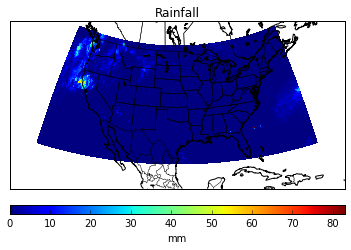

In [20]:
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(r))

# Add Grid Lines
#m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
#m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(r_units)

# Add Title
plt.title('Rainfall')